<a href="https://colab.research.google.com/github/Hashmil-Muhammed/Machine-Learning/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MULTI-CLASS CLASSIFICATION ANALYSIS**

# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# **Loading data**

In [ ]:
# lets read the dataset

# df=pd.read_csv('/content/Crop_recommendation.csv')     #on google drive
df=pd.read_csv(rf'G:\My Drive\Google colab\Projects\Project2\Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


The dataset above allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

Data fields:

* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm

In [ ]:
# lets check the shape of the dataset
print("Shape of the Dataset :",df.shape)

Shape of the Dataset : (2200, 8)


In [ ]:
# lets check if there is any missing value present in the dataset
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no missing values in the data

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
# lets check the Crops present in this Dataset
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

        not a imbalanced DS

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

# **Exploratory Data Analysis**

<Axes: >

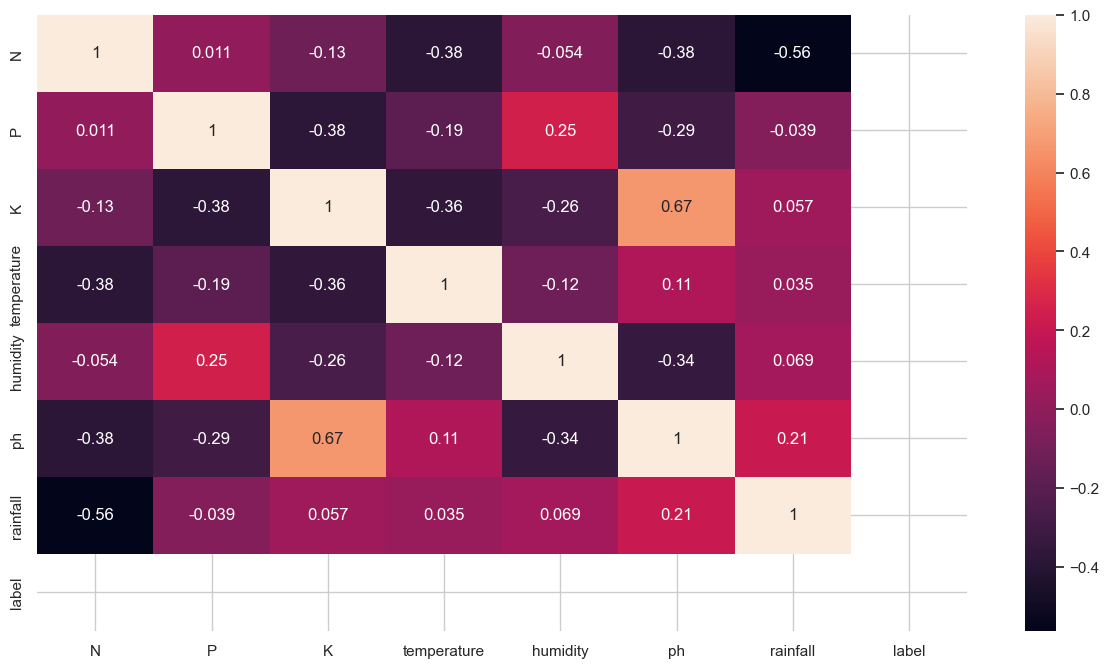

In [ ]:
sns.heatmap(df.corr(),annot=True)

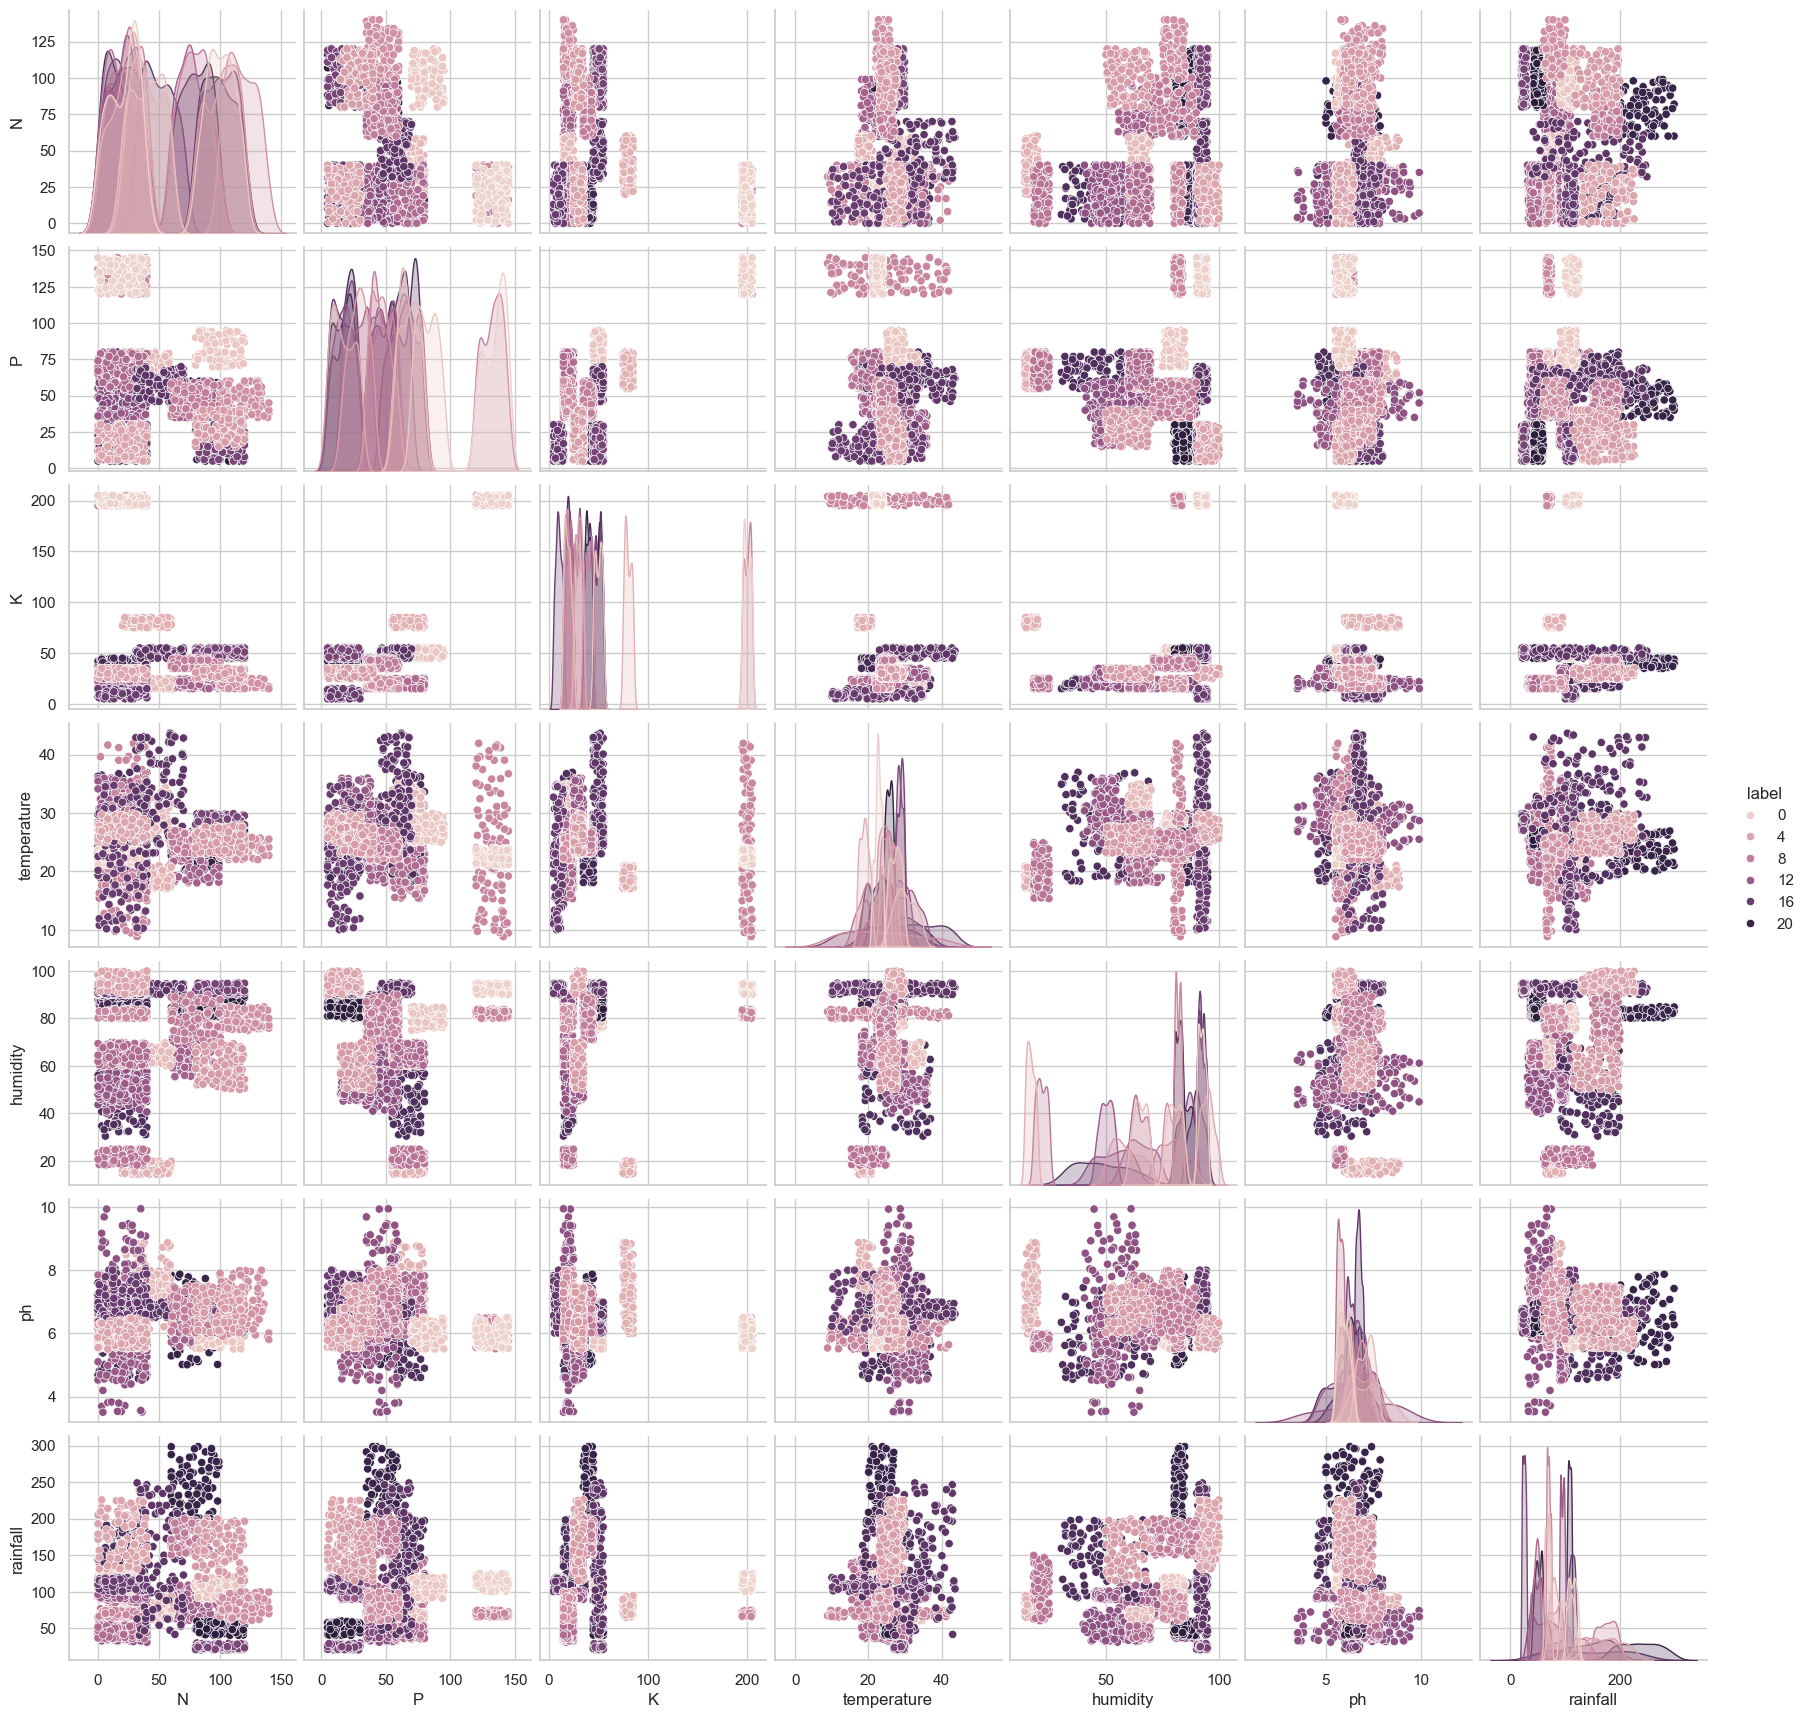

In [ ]:
sns.pairplot(df,hue = 'label')

<Axes: xlabel='label', ylabel='ph'>

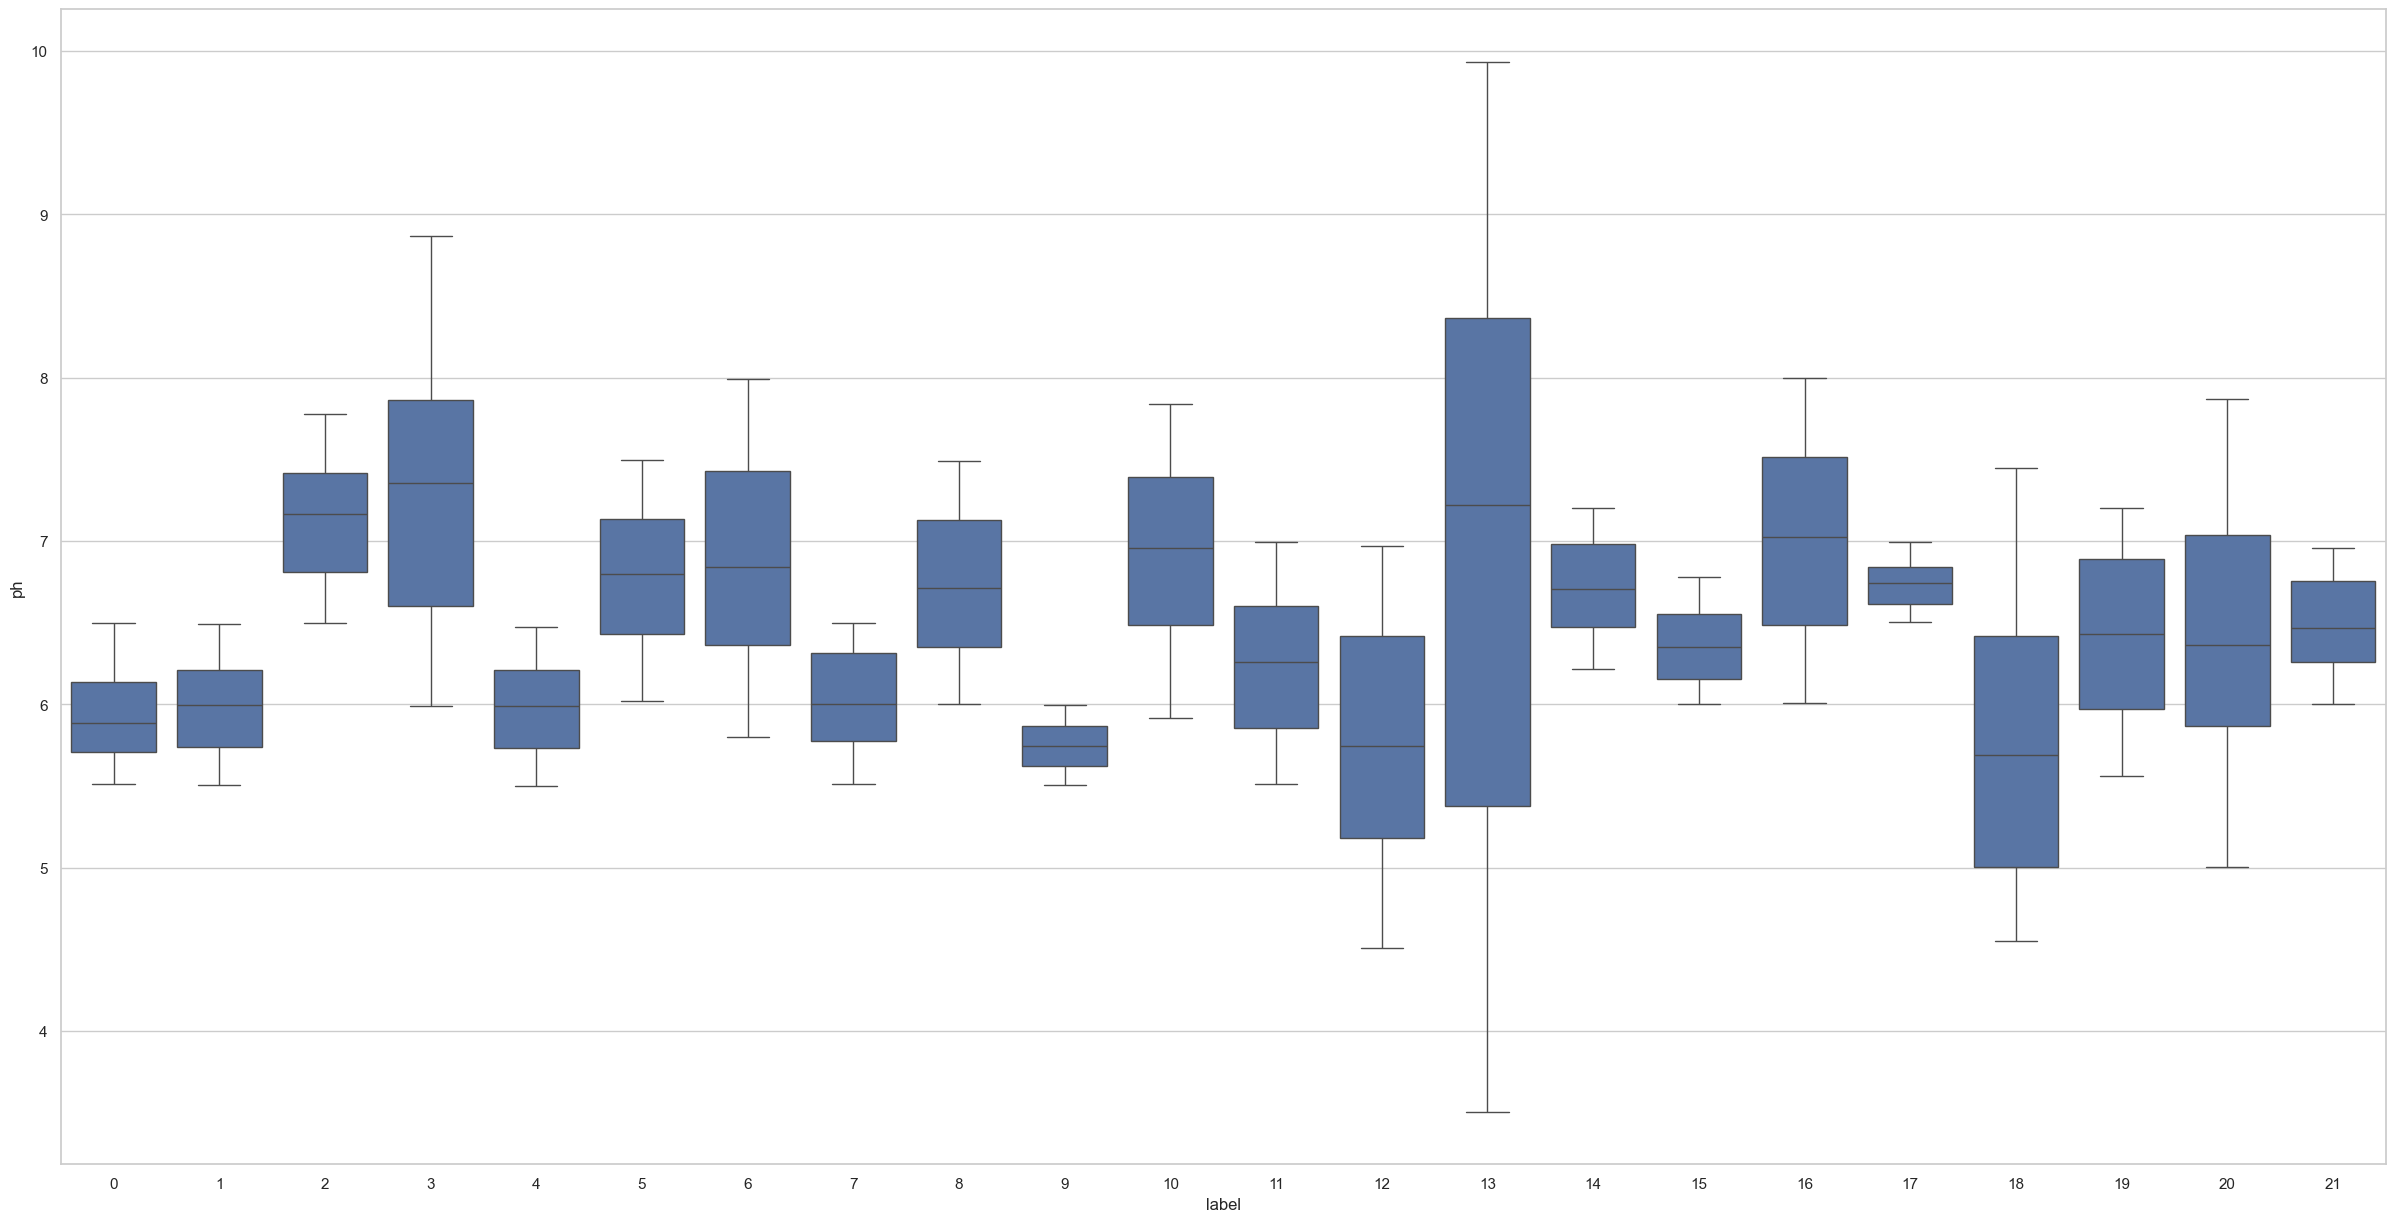

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=df)

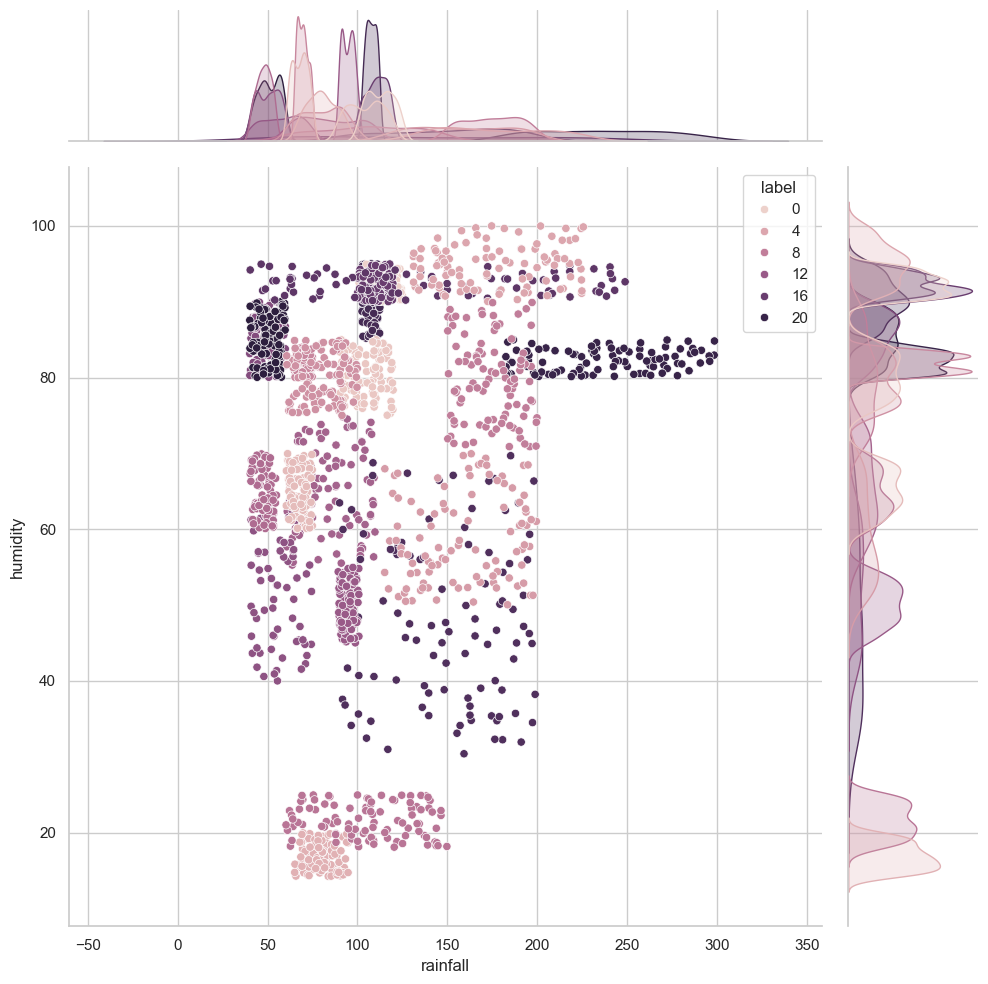

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<40) &
                                                  (df['rainfall']>40)],height=10,hue="label")

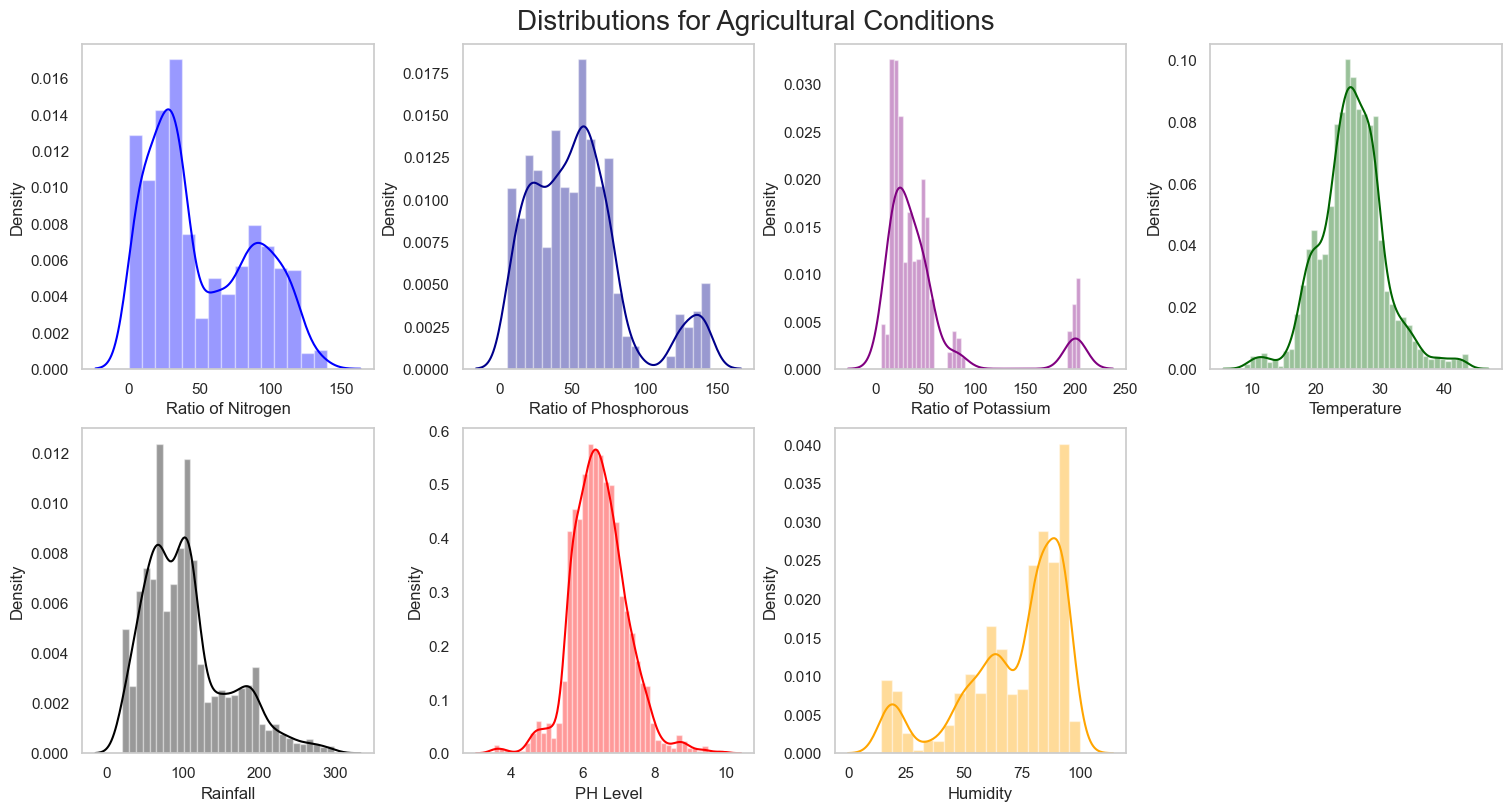

In [ ]:
#Distribution for Agricultural Conditions

plt.figure(layout='constrained')
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2,4,1)
sns.distplot(df["N"],color="blue")
plt.xlabel("Ratio of Nitrogen",fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df["P"],color="darkblue")
plt.xlabel("Ratio of Phosphorous",fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df["K"],color="purple")
plt.xlabel("Ratio of Potassium",fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df["temperature"],color="darkgreen")
plt.xlabel("Temperature",fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df["rainfall"],color="black")
plt.xlabel("Rainfall",fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df["ph"],color="red")
plt.xlabel("PH Level",fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df["humidity"],color="orange")
plt.xlabel("Humidity",fontsize = 12)
plt.grid()

plt.suptitle("Distributions for Agricultural Conditions",fontsize=20)
plt.show()

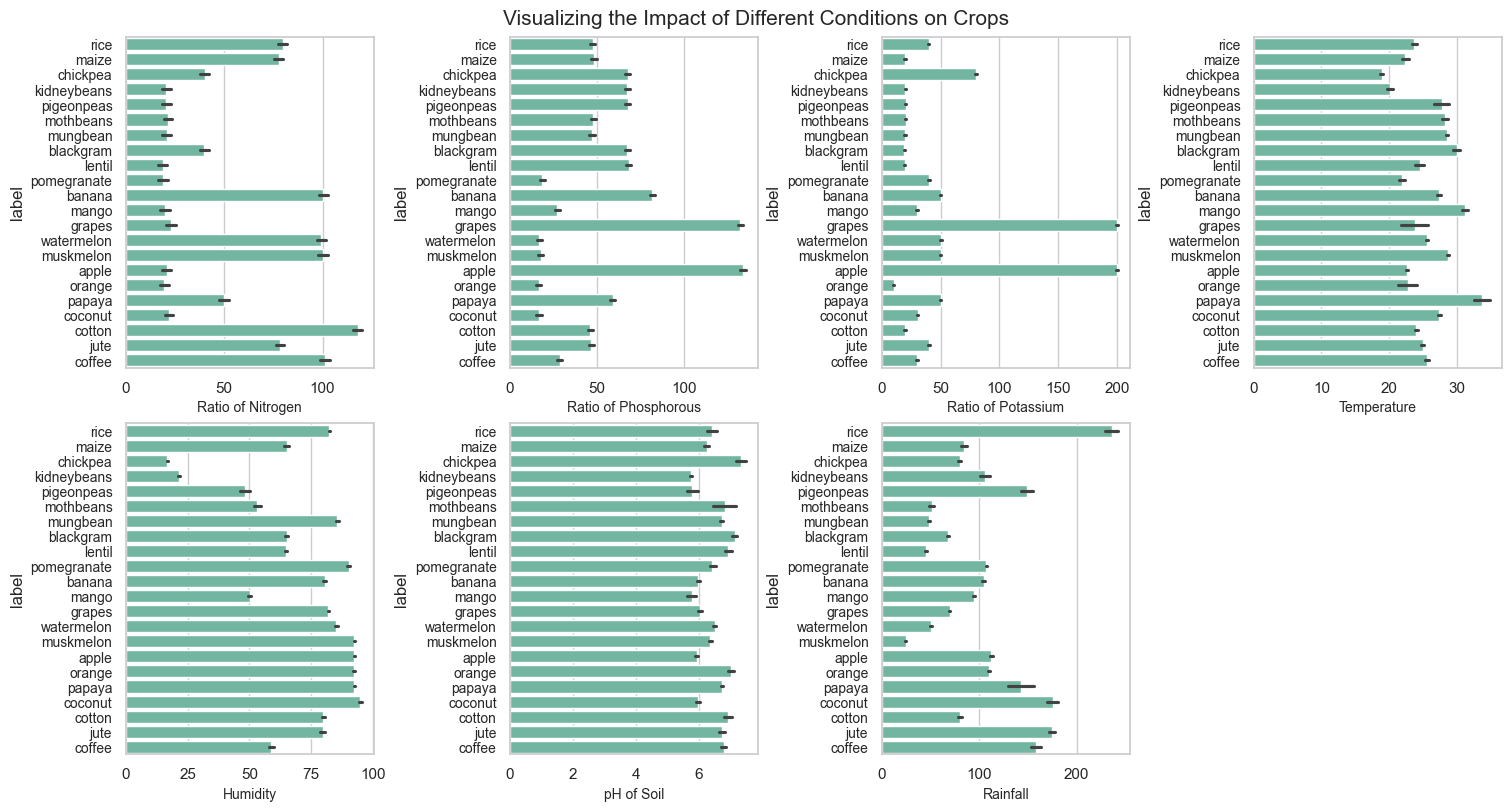

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(layout='constrained')
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(x='N', y='label', data=df)
plt.xlabel('Ratio of Nitrogen', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 2)
sns.barplot(x='P', y='label', data=df)
plt.xlabel('Ratio of Phosphorous', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 3)
sns.barplot(x='K', y='label', data=df)
plt.xlabel('Ratio of Potassium', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 4)
sns.barplot(x='temperature', y='label', data=df)
plt.xlabel('Temperature', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 5)
sns.barplot(x='humidity', y='label', data=df)
plt.xlabel('Humidity', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 6)
sns.barplot(x='ph', y='label', data=df)
plt.xlabel('pH of Soil', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 7)
sns.barplot(x='rainfall', y='label', data=df)
plt.xlabel('Rainfall', fontsize=10)
plt.yticks(fontsize=10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize=15)
plt.show()


In [ ]:
f= plt.figure(figsize=(15,5))
sns.countplot(df['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()

In [ ]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
0,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [ ]:
import plotly.graph_objects as go

# Assuming crop_summary has columns 'N', 'P', 'K', and an index for crop names

fig = go.Figure()

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(
    title="N-P-K values comparison between crops",
    plot_bgcolor='white',
    barmode='group',
    xaxis_tickangle=-45
)

fig.show()


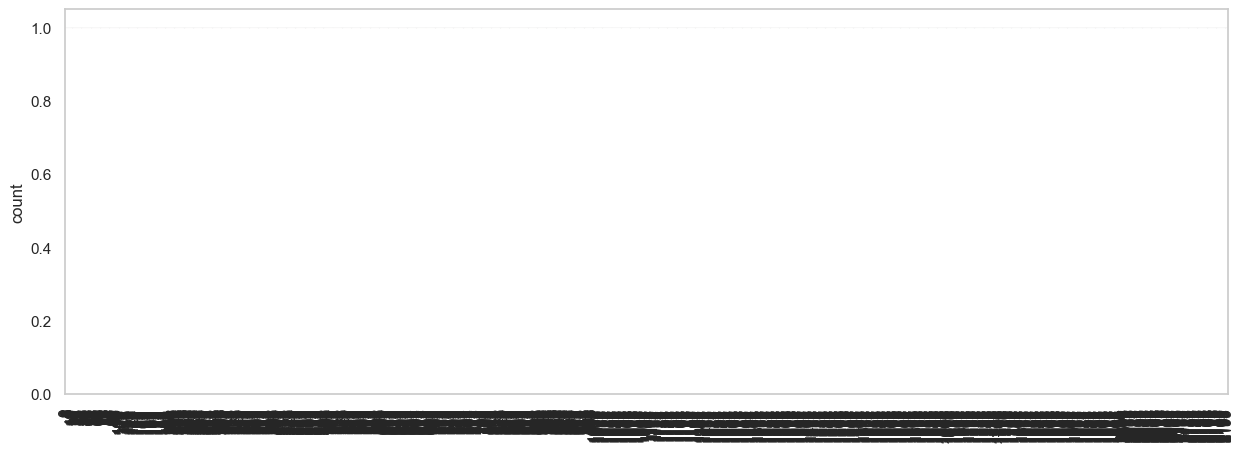

In [ ]:
f= plt.figure(figsize=(15,5))
sns.countplot(df['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()

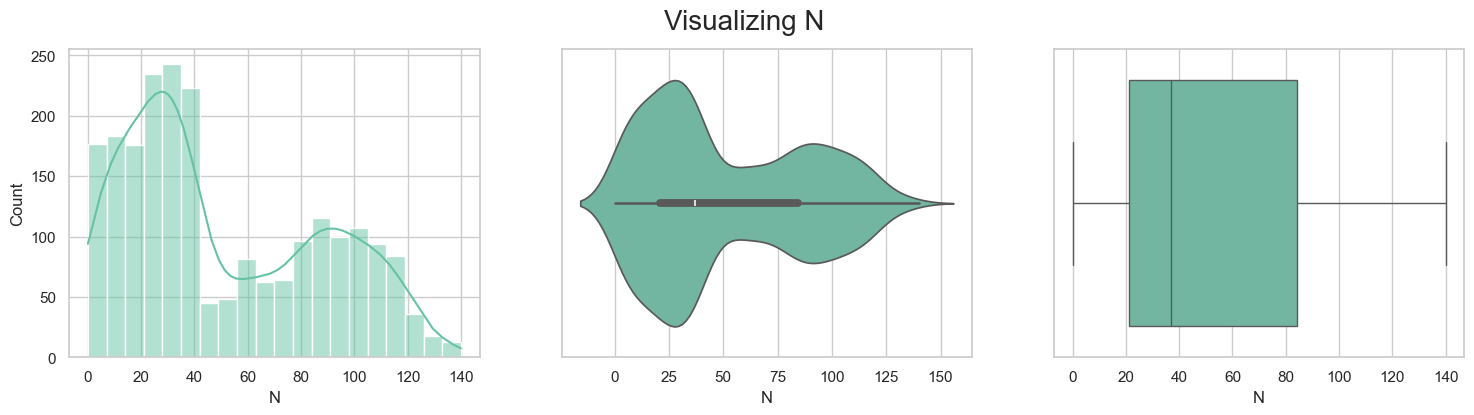

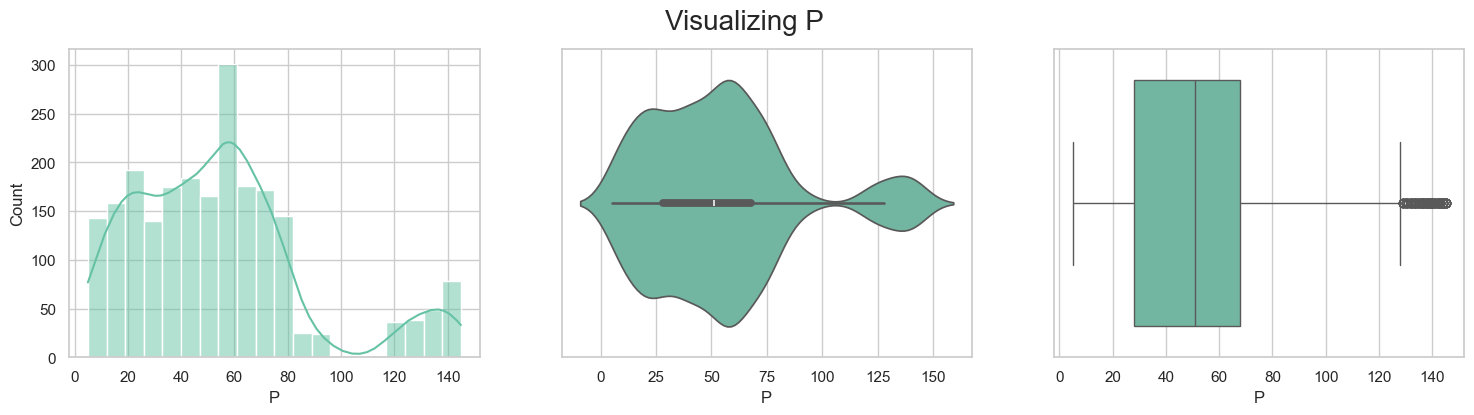

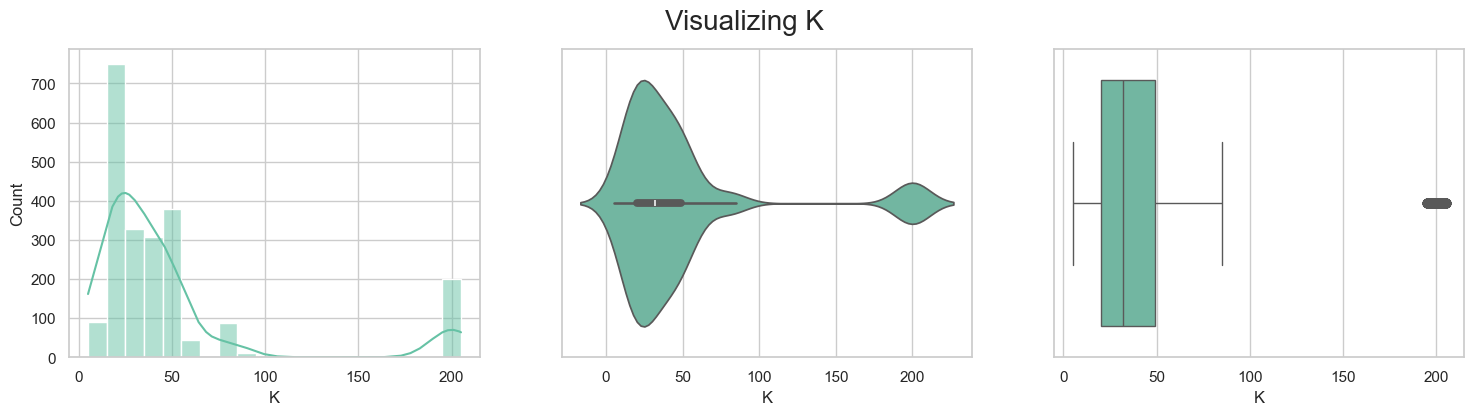

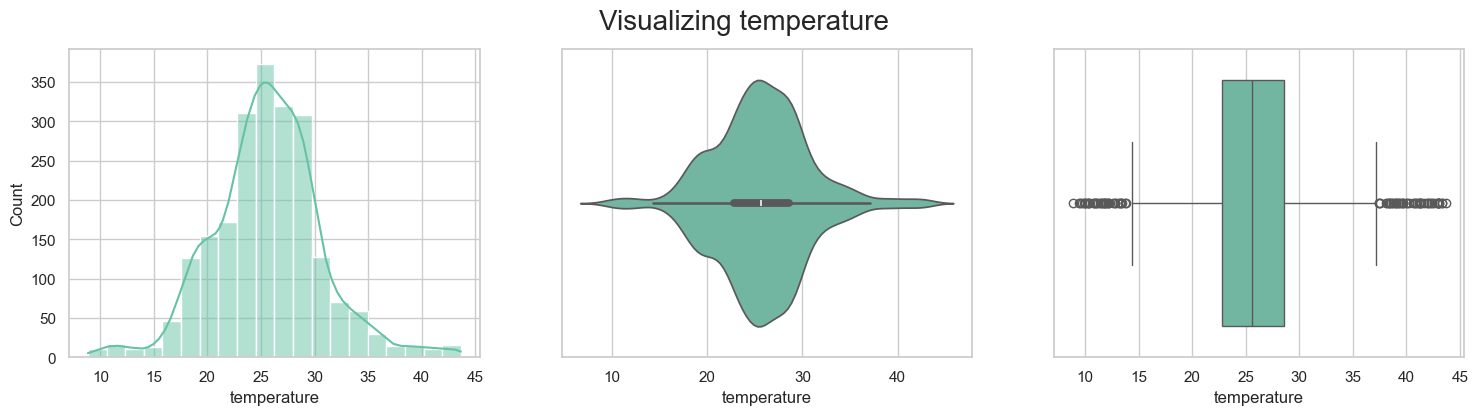

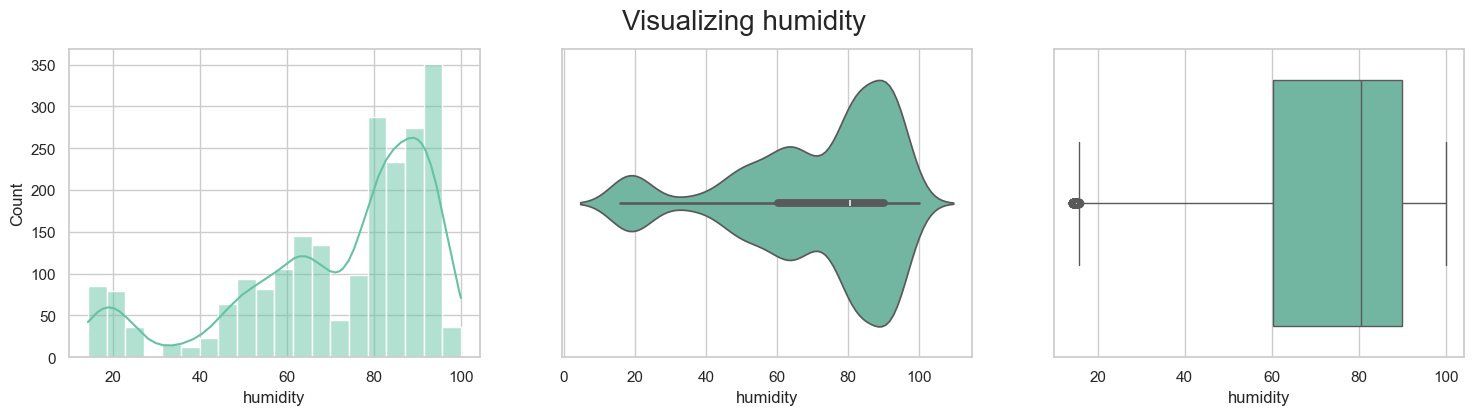

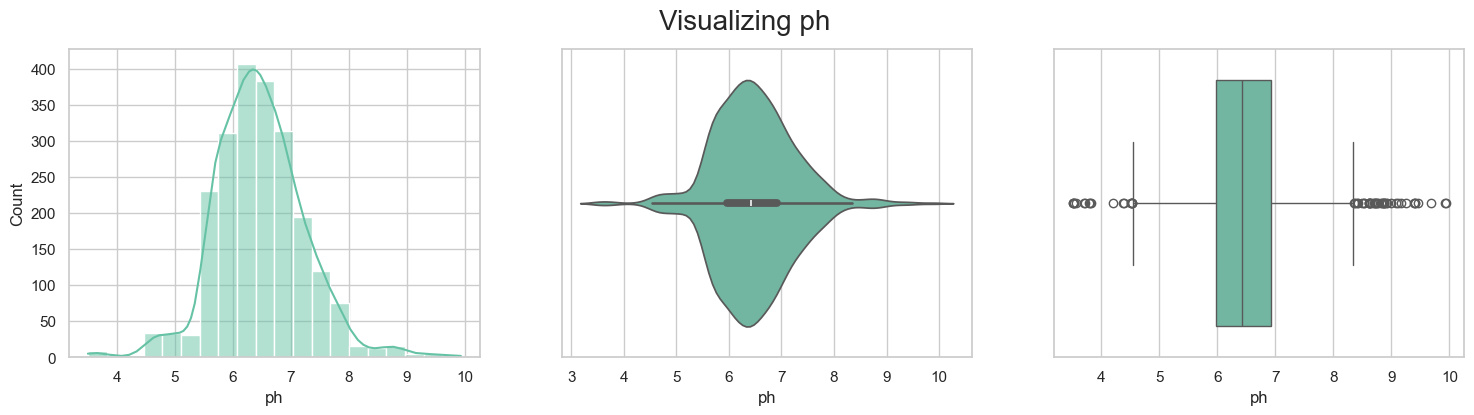

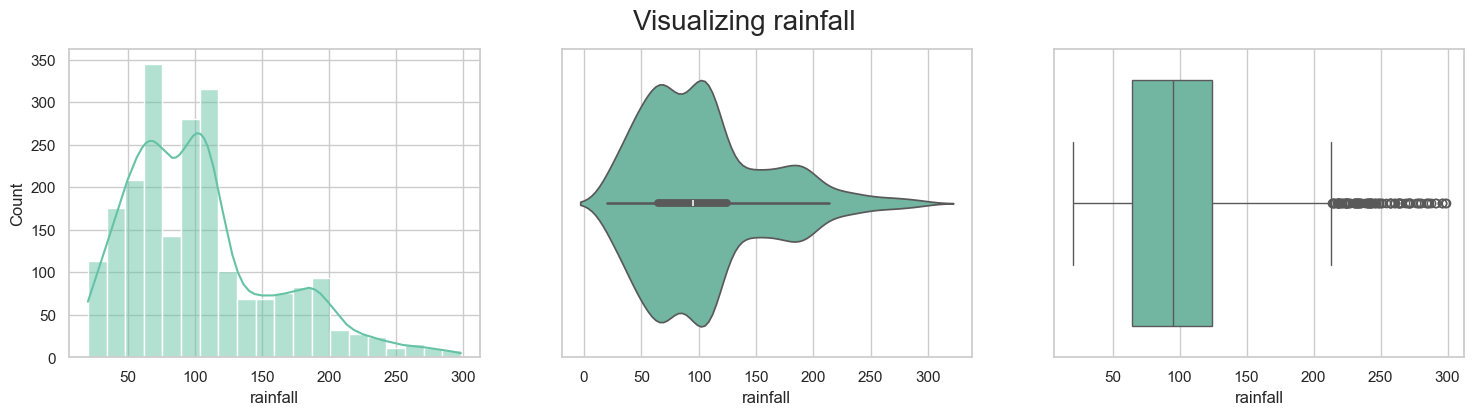

In [ ]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [ ]:
grouped = df.groupby(by='label').mean().reset_index()
grouped

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [ ]:
print(f'********************************')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

********************************
Top 5 Most N requiring crops:
********************************
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
********************************
Top 5 Most P requiring crops:
********************************
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
********************************
Top 5 Most K requiring crops:
********************************
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
********************************
Top 5 Most temperature requiring crops:
********************************
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
********************************
Top 5 Most humidity requiring crops:
********************************
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34280196089999
apple -

# **Seperating features and target label**

In [ ]:
df['label'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df

In [ ]:
df['label'].unique()

In [ ]:
X = df.iloc[:,:-1]
y = df["label"]

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (2200, 7)
Shape of y: (2200,)


In [ ]:
#create training and testing sets for validation of results

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shape of X train:",X_train.shape)
print("Shape of y train:",y_train.shape)
print("Shape of X test:",X_test.shape)
print("Shape of y test:",y_test.shape)


Shape of X train: (1540, 7)
Shape of y train: (1540,)
Shape of X test: (660, 7)
Shape of y test: (660,)


# **Modeling Classification algorithms**

In [ ]:
# lets create a Predictive Models
knn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier(random_state=1,criterion= 'gini', max_depth= 9)
rf=RandomForestClassifier(random_state=1)
lr=LogisticRegression(C=100)

models=[knn,sv,nb,dt,rf,lr]
for model in models:
    print("*"*25,model,"*"*25)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_pred,y_test))


************************* KNeighborsClassifier() *************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       1.00      0.91      0.95        32
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        28
           6       1.00      0.97      0.99        37
           7       1.00      1.00      1.00        44
           8       0.97      0.89      0.93        35
           9       1.00      1.00      1.00        33
          10       0.96      0.90      0.93        29
          11       0.96      1.00      0.98        27
          12       1.00      0.97      0.98        33
          13       0.85      1.00      0.92        28
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        36
      

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       0.97      0.97      0.97        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        44
           8       0.97      0.89      0.93        35
           9       1.00      1.00      1.00        33
          10       0.96      0.93      0.95        28
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        32
          13       0.97      1.00      0.98        32
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        36
          16       1.00      1.00      1.00        23
          17       1.00    

**From the Above Accuracies, We have adopt RandomForestClassifier,GaussianNB,DecisionTreeClassifier as it has Maximum Accuracy**

# **Accuracy comparison**

In [ ]:
acc = [model.score(X_test, y_test) for model in models]
df1 = pd.DataFrame({'Algorithm': [model.__class__.__name__ for model in models], 'Accuracy': acc})
df1['Accuracy'] = df1['Accuracy'].round(2)
df1 = df1.sort_values(by='Accuracy', ascending=False)
df1

,Algorithm,Accuracy
2,GaussianNB,1.00
3,DecisionTreeClassifier,1.00
4,RandomForestClassifier,1.00
1,SVC,0.99
0,KNeighborsClassifier,0.98
5,LogisticRegression,0.98


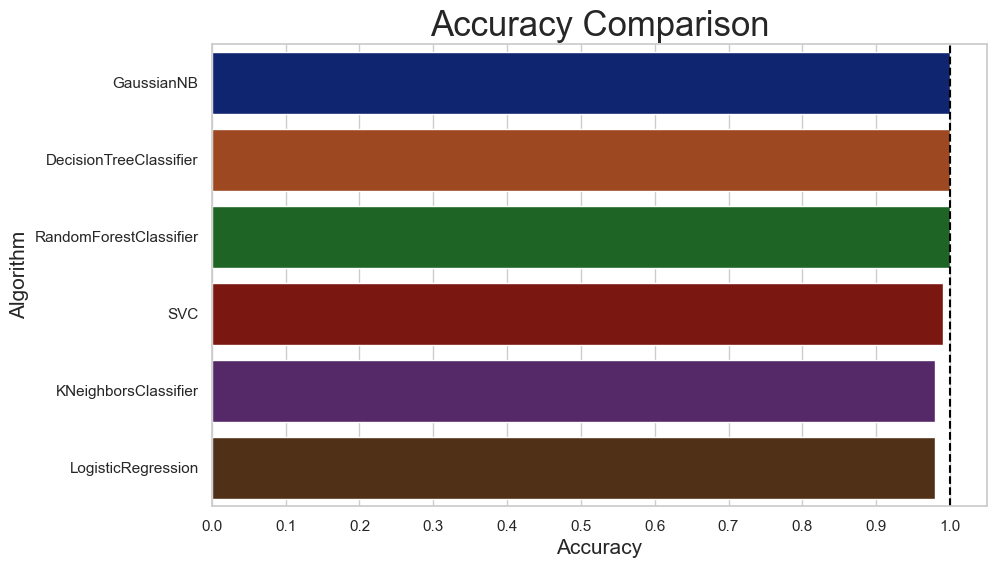

In [ ]:

plt.figure(figsize=(10, 6))
plt.title('Accuracy Comparison',fontsize = 25)
plt.xlabel('Accuracy',fontsize = 15)
plt.ylabel('Algorithm',fontsize = 15)
sns.barplot(x='Accuracy', y='Algorithm', data=df1, palette='dark')
plt.axvline(x=1.0, color='black', linestyle='--')
plt.xticks([i/10 for i in range(11)])
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

# **Making a prediction**

In [ ]:

model_pred=[nb,dt,rf]
for model in model_pred:
    print("*"*25,model,"*"*25)
    y_new = np.array([[20, 30, 10, 15, 90, 7.5, 100]])
    # y_new = np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]])
    new_pred = scaler.transform(y_new)
    new_pred1 = model.predict(new_pred)
    prediction = le.inverse_transform(new_pred1)
    print("The Suggested Crop for Given Climatic Condition is:", prediction)
    print()

************************* GaussianNB() *************************
The Suggested Crop for Given Climatic Condition is: ['orange']

************************* DecisionTreeClassifier(max_depth=9, random_state=1) *************************
The Suggested Crop for Given Climatic Condition is: ['orange']

************************* RandomForestClassifier(random_state=1) *************************
The Suggested Crop for Given Climatic Condition is: ['orange']



**Our Predictive Model works very well.
This Predictive model is usefull for Modern Farming**